# Heart Failure Prediction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('datasets/heart_failure_clinical_records_dataset.csv')

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


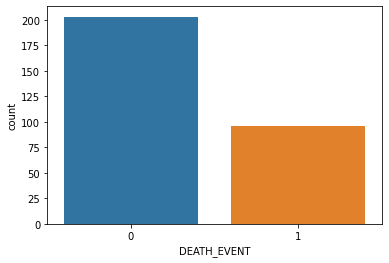

In [4]:
sns.countplot(data['DEATH_EVENT'])

In [5]:
data.groupby('DEATH_EVENT')['DEATH_EVENT'].count()

DEATH_EVENT
0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [6]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
data.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [8]:
cat_data = [col for col in data.columns if data[col].nunique()<=2 ]
num_data = [col for col in data.columns if data[col].nunique()>2 ]

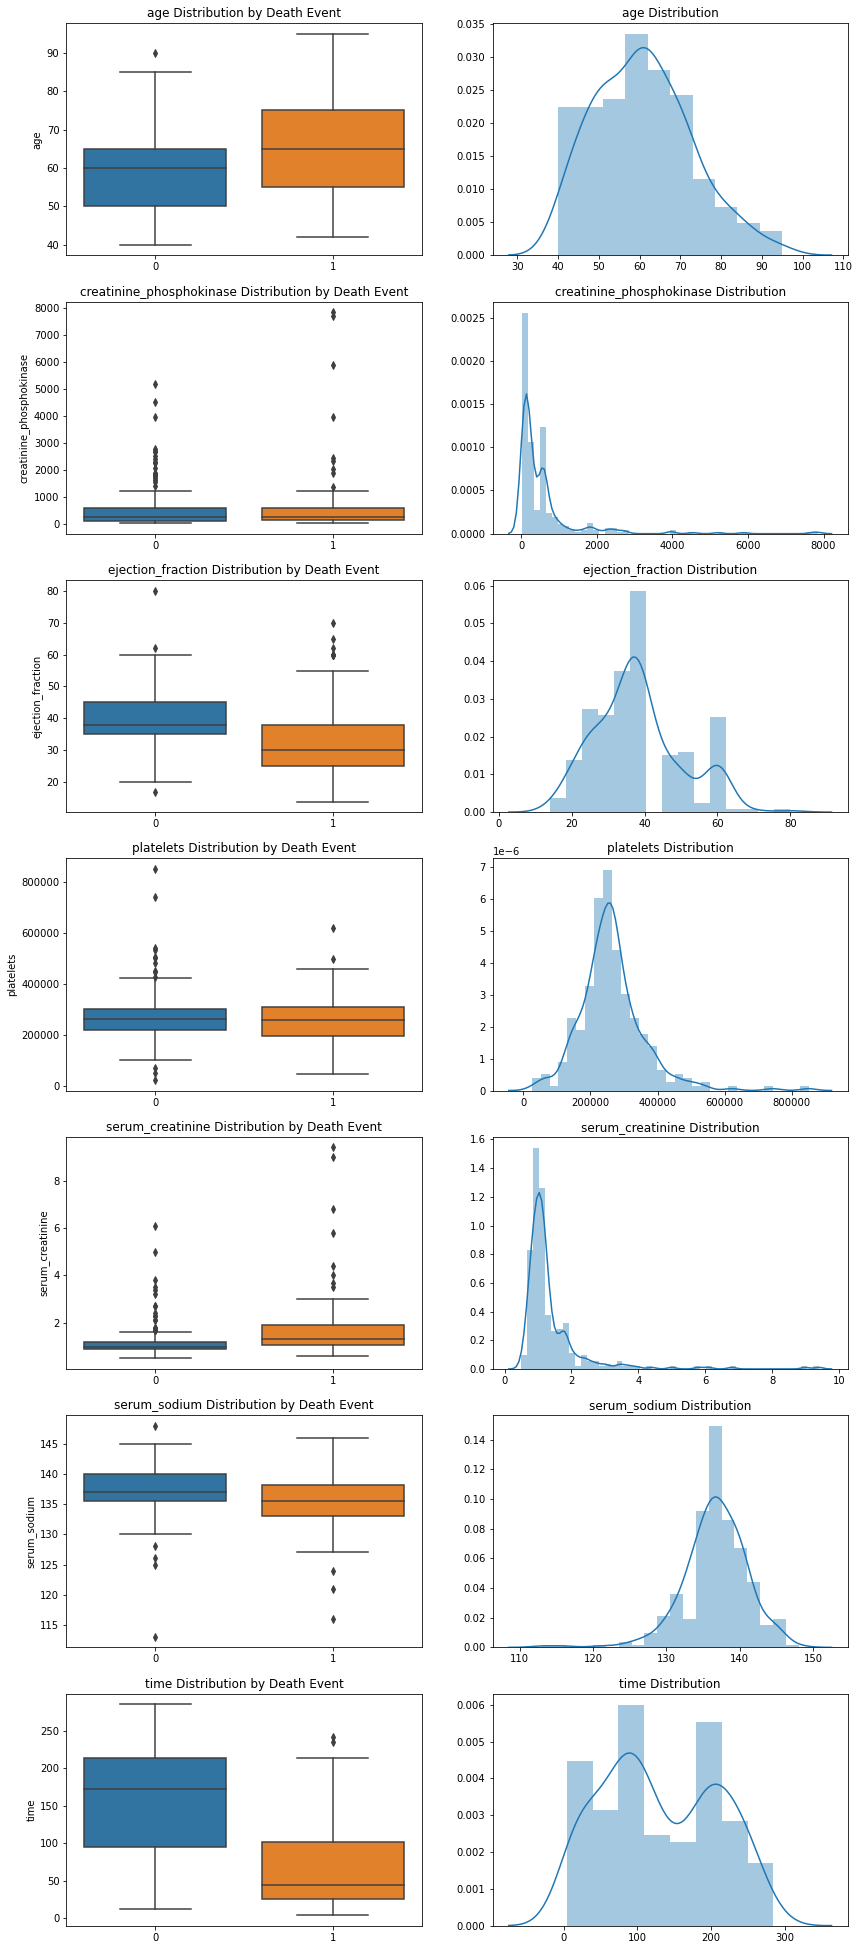

In [9]:
c=1
fig = plt.figure(figsize=(14,35))
for i in num_data:
    plt.subplot(7,2,c)
    sns.boxplot(x=data['DEATH_EVENT'],y=data[i])
    plt.title(i + ' Distribution by Death Event')
    plt.xlabel('')
    c=c+1

    plt.subplot(7,2,c)
    sns.distplot(data[i])
    plt.title(i + ' Distribution')
    plt.xlabel('')
    c=c+1

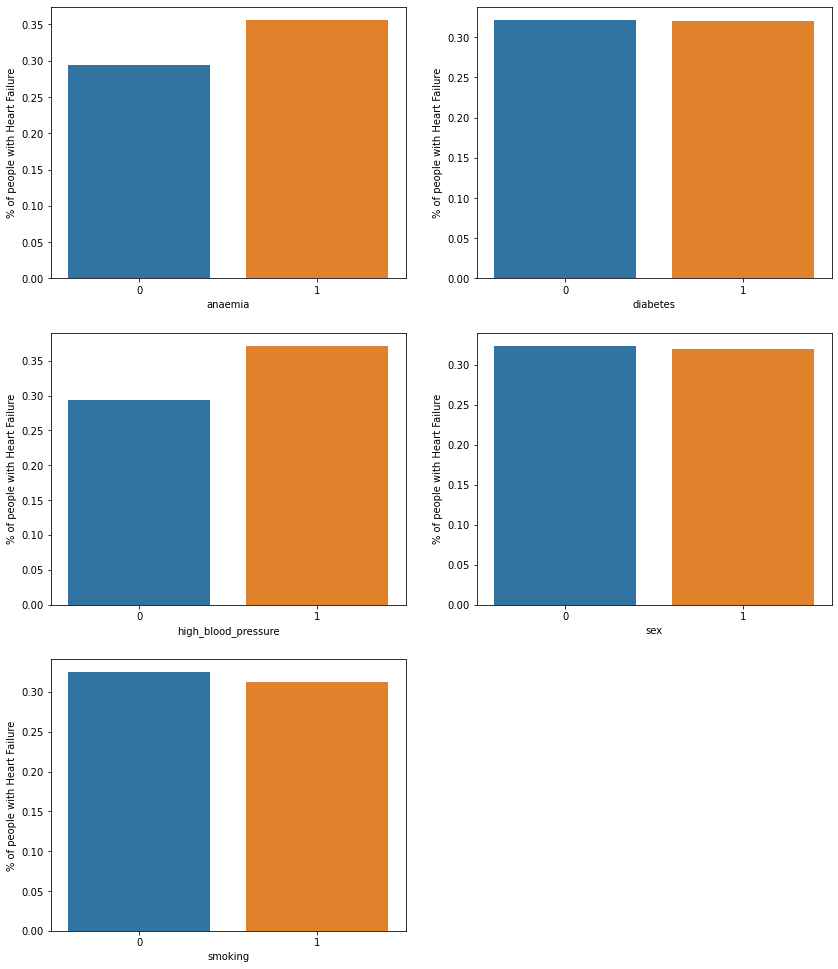

In [10]:
c = 1
fig = plt.figure(figsize=(14,35))
cat_data.remove('DEATH_EVENT')
for i in cat_data:
    newDF = pd.DataFrame(data.groupby(i)['DEATH_EVENT'].mean()).reset_index()
    plt.subplot(6,2,c)
    sns.barplot(x=newDF[i],y=newDF['DEATH_EVENT'])
    plt.ylabel('% of people with Heart Failure')
    c=c+1
    del newDF

In [11]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Data Modeling

#### Decision Tree Classifier

In [12]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [13]:
x = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state = 21)

In [15]:
decision_tree = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=15)
decision_tree.fit(x_train,y_train)
train_score = decision_tree.score(x_train,y_train)
print("Training score :",round(train_score,3))
test_score = decision_tree.score(x_test,y_test)
print("Test score     :",round(test_score,3))
print('Difference :',round(train_score-test_score,3))

Training score : 0.9
Test score     : 0.833
Difference : 0.066


In [16]:
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=15)
decision_tree.fit(x_train,y_train)
train_score = decision_tree.score(x_train,y_train)
print("Training score :",round(train_score,3))
test_score = decision_tree.score(x_test,y_test)
print("Test score     :",round(test_score,3))
print('Difference :',round(train_score-test_score,3))

Training score : 0.9
Test score     : 0.856
Difference : 0.044


In [17]:
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=15)
decision_tree.fit(x_train,y_train)
train_score = decision_tree.score(x_train,y_train)
print("Training score :",round(train_score,3))
test_score = decision_tree.score(x_test,y_test)
print("Test score     :",round(test_score,3))
print('Difference :',round(train_score-test_score,3))

Training score : 0.933
Test score     : 0.844
Difference : 0.089


In [18]:
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=15)
decision_tree.fit(x_train,y_train)
train_score = decision_tree.score(x_train,y_train)
print("Training score :",round(train_score,3))
test_score = decision_tree.score(x_test,y_test)
print("Test score     :",round(test_score,3))
print('Difference :',round(train_score-test_score,3))

Training score : 0.967
Test score     : 0.778
Difference : 0.189


In [19]:
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=7,random_state=15)
decision_tree.fit(x_train,y_train)
train_score = decision_tree.score(x_train,y_train)
print("Training score :",round(train_score,3))
test_score = decision_tree.score(x_test,y_test)
print("Test score     :",round(test_score,3))
print('Difference :',round(train_score-test_score,3))

Training score : 0.99
Test score     : 0.778
Difference : 0.213


In [20]:
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=15)
decision_tree.fit(x_train,y_train)
train_score = decision_tree.score(x_train,y_train)
print("Training score :",round(train_score,3))
test_score = decision_tree.score(x_test,y_test)
print("Test score     :",round(test_score,3))
print('Difference :',round(train_score-test_score,3))

Training score : 1.0
Test score     : 0.811
Difference : 0.189


In [21]:
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=9,random_state=15)
decision_tree.fit(x_train,y_train)
train_score = decision_tree.score(x_train,y_train)
print("Training score :",round(train_score,3))
test_score = decision_tree.score(x_test,y_test)
print("Test score     :",round(test_score,3))
print('Difference :',round(train_score-test_score,3))

Training score : 1.0
Test score     : 0.811
Difference : 0.189


In [22]:
#Using Gridsearch CV for hyper marameter tuning

from sklearn.model_selection import GridSearchCV

In [23]:
# params = {'criterion': ['entropy','gini'], 'max_depth': list(range(3,9))}
# Decision_Tree = DecisionTreeClassifier(random_state=25)
# clf = GridSearchCV(Decision_Tree,params,cv = 10, scoring='accuracy')
# clf.fit(x_train,y_train)
# print(clf.best_params_)
# print(clf.best_score_)

In [24]:
# Building the model by the parameter determined by Gridsearch CV
Decision_Tree = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=25)
Decision_Tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=25)

In [25]:
y_predicted_dt = Decision_Tree.predict(x_test)

#### Performance Evaluation

In [26]:
Accuracy_score = {}
auc_data = {}



In [27]:
print(classification_report(y_test,y_predicted_dt))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        68
           1       0.63      0.86      0.73        22

    accuracy                           0.84        90
   macro avg       0.79      0.85      0.81        90
weighted avg       0.87      0.84      0.85        90



Text(33.0, 0.5, 'Actual')

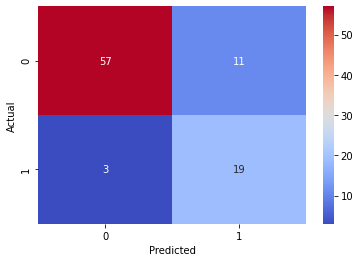

In [28]:
sns.heatmap(confusion_matrix(y_test,y_predicted_dt),annot=True,cmap="coolwarm")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [29]:
Accuracy_score = {'Decision Tree' : accuracy_score(y_test,y_predicted_dt)}
print("Accuracy Score of the model :",round(accuracy_score(y_test,y_predicted_dt)*100,1),"%")

Accuracy Score of the model : 84.4 %


In [30]:
y_prob_dt= Decision_Tree.predict_proba(x_test)[:,1]
fpr_dt,tpr_dt,thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

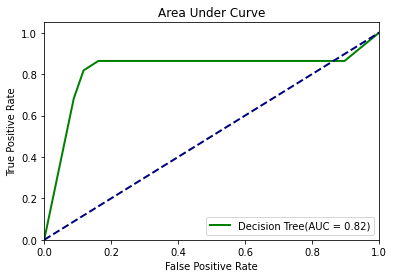

In [31]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

### Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
param_dist = {
#               'max_depth': [2, 3, 4,5,6],
#               'bootstrap': [True, False],
#               'criterion': ['gini', 'entropy'],
              'n_estimators' :[300,350,400,450,500,550,600,650,700,750,800,850,900]
             }

In [34]:
# Random_Forest = RandomForestClassifier(random_state=15)
# gcv = GridSearchCV(Random_Forest,param_grid=param_dist,cv=10)
# gcv.fit(x_train,y_train)
# print('Best Parameters :' , gcv.best_params_)
# print('Best scores :', gcv.best_score_)

In [35]:
# Finding the optimum n_estimators value by plotting n v/s OOB (Out of Bag) error rate

Random_forest = RandomForestClassifier(max_depth=5,n_estimators=10,random_state=15,bootstrap=True,criterion='entropy')
Random_forest.set_params(warm_start=True,oob_score=True)

# error_rate = {}
# for i in range(15,1001):
#     Random_forest.set_params(n_estimators=i)
#     Random_forest.fit(x_train,y_train)
#     oob_error = 1-Random_forest.oob_score_
#     error_rate[i]=oob_error

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10,
                       oob_score=True, random_state=15, warm_start=True)

In [36]:
# oob_series = pd.Series(error_rate)

In [37]:
# fig, ax = plt.subplots(figsize=(10, 10))

# ax.set_facecolor('#fafafa')

# oob_series.plot(kind='line',color = 'red')
# # plt.axhline(0.055, color='#875FDB',linestyle='--')
# # plt.axhline(0.05, color='#875FDB',linestyle='--')
# plt.xlabel('n_estimators')
# plt.ylabel('OOB Error Rate')
# plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [38]:
# as the above plot shows the optimum value of n is above 200 as the plots are almost contant after 200

In [39]:
# Using the parameters retuned by Grid search CV and n_estimator got by OOB plot we can build the model
Random_forest = RandomForestClassifier(max_depth=5,n_estimators=250,random_state=15,bootstrap=True,criterion='entropy')
Random_forest.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=250,
                       random_state=15)

In [40]:
y_predict_rf = Random_forest.predict(x_test)
y_predictProb_rf = Random_forest.predict_proba(x_test)[:,1]

In [41]:
print(classification_report(y_test,y_predict_rf))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92        68
           1       0.70      0.86      0.78        22

    accuracy                           0.88        90
   macro avg       0.83      0.87      0.85        90
weighted avg       0.89      0.88      0.88        90



Text(33.0, 0.5, 'Actual')

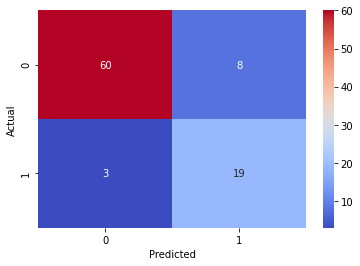

In [42]:
sns.heatmap(confusion_matrix(y_test,y_predict_rf),annot=True,cmap="coolwarm")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [43]:
Accuracy_score = {'Decision Tree' : accuracy_score(y_test,y_predict_rf)}
print("Accuracy Score of the model :",round(accuracy_score(y_test,y_predict_rf)*100,1),"%")

Accuracy Score of the model : 87.8 %


In [44]:
fpr_rf,tpr_rf,threshold_rf = roc_curve(y_test,y_predictProb_rf)
roc_auc_rf = auc(fpr_rf,tpr_rf)

In [45]:
roc_auc_rf

0.9485294117647058

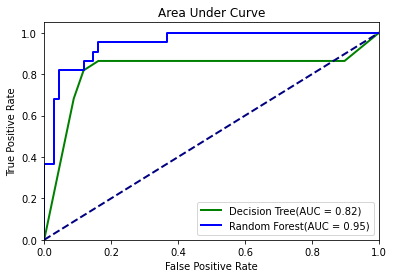

In [46]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(fpr_rf, tpr_rf, color='Blue',
         lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_rf)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [48]:
Log_Regression = LogisticRegression()
Log_Regression.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
y_predicted_Log_reg = Log_Regression.predict(x_test)

In [50]:
accuracy_score(y_test,y_predicted_Log_reg)

0.8555555555555555

In [51]:
print(classification_report(y_test,y_predicted_Log_reg))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        68
           1       0.71      0.68      0.70        22

    accuracy                           0.86        90
   macro avg       0.81      0.80      0.80        90
weighted avg       0.85      0.86      0.85        90



Text(33.0, 0.5, 'Actual')

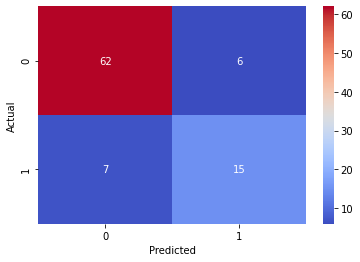

In [52]:
sns.heatmap(confusion_matrix(y_test,y_predicted_Log_reg),annot=True,cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [53]:
print("Accuracy Score of the model :",round(accuracy_score(y_test,y_predicted_Log_reg)*100,1),"%")

Accuracy Score of the model : 85.6 %


In [54]:
y_Proba_LogReg = Log_Regression.predict_proba(x_test)[:,1]

In [55]:
fpr_lr,tpr_lr,Threshold_lr = roc_curve(y_test,y_Proba_LogReg)
roc_auc_lr = auc(fpr_lr,tpr_lr)
roc_auc_lr

0.9131016042780749

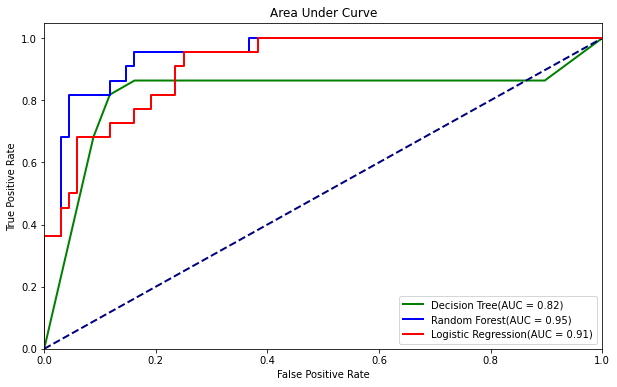

In [56]:
plt.figure(figsize=(10,6))
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(fpr_rf, tpr_rf, color='Blue',
         lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_lr, tpr_lr, color='red',
         lw=lw, label='Logistic Regression(AUC = %0.2f)' % roc_auc_lr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [57]:
# Checking the same model by standardizing the data

In [58]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

In [59]:
Log_Regression_std = LogisticRegression()
Log_Regression_std.fit(x_train_std,y_train)


LogisticRegression()

In [60]:
y_predicted_Log_reg_std = Log_Regression_std.predict(x_test_std)

In [61]:
accuracy_score(y_test,y_predicted_Log_reg_std)

0.8777777777777778

In [62]:
print(classification_report(y_test,y_predicted_Log_reg_std))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        68
           1       0.74      0.77      0.76        22

    accuracy                           0.88        90
   macro avg       0.83      0.84      0.84        90
weighted avg       0.88      0.88      0.88        90



Text(33.0, 0.5, 'Actual')

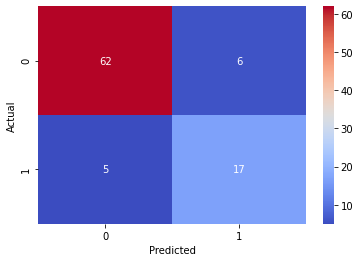

In [63]:
sns.heatmap(confusion_matrix(y_test,y_predicted_Log_reg_std),annot=True,cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [64]:
print("Accuracy Score of the model :",round(accuracy_score(y_test,y_predicted_Log_reg_std)*100,1),"%")

Accuracy Score of the model : 87.8 %


In [65]:
y_Proba_LogReg_std = Log_Regression_std.predict_proba(x_test_std)[:,1]

In [66]:
fpr_lr_std,tpr_lr_std,Threshold_lr_std = roc_curve(y_test,y_Proba_LogReg_std)
roc_auc_lr_std = auc(fpr_lr_std,tpr_lr_std)
roc_auc_lr_std

0.9057486631016043

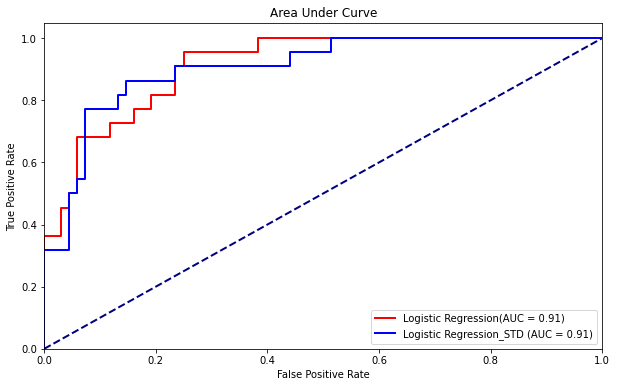

In [67]:
plt.figure(figsize=(10,6))
lw = 2

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.plot(fpr_lr, tpr_lr, color='red',
         lw=lw, label='Logistic Regression(AUC = %0.2f)' % roc_auc_lr)

plt.plot(fpr_lr_std, tpr_lr_std, color='blue',
         lw=lw, label='Logistic Regression_STD (AUC = %0.2f)' % roc_auc_lr_std)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## K-Nearest Neighbor

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
# We should find the optimum value of K

In [70]:
# error = []
# for i in range(1,40):
#     KNN = KNeighborsClassifier(n_neighbors = i)
#     KNN.fit(x_train_std,y_train)
#     pred_i = KNN.predict(x_test_std)
#     error.append(np.mean(pred_i != y_test))

In [71]:
# plt.figure(figsize=(10,6))
# plt.plot(range(1,40),error,marker='o')

In [76]:
# K is constant at n =25
KNN = KNeighborsClassifier(n_neighbors = 25)
KNN.fit(x_train_std,y_train)

KNeighborsClassifier(n_neighbors=25)

In [77]:
y_predicted_KNN = KNN.predict(x_test_std)
y_prob_KNN = KNN.predict_proba(x_test_std)[:,1]

In [78]:
accuracy_score(y_test,y_predicted_KNN)

0.8333333333333334

In [79]:
print(classification_report(y_test,y_predicted_KNN))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90        68
           1       0.89      0.36      0.52        22

    accuracy                           0.83        90
   macro avg       0.86      0.67      0.71        90
weighted avg       0.84      0.83      0.81        90



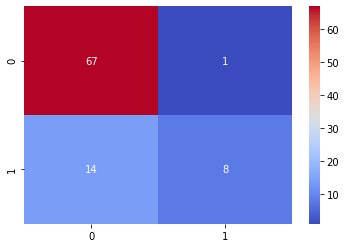

In [80]:
sns.heatmap(confusion_matrix(y_test,y_predicted_KNN),annot=True,cmap='coolwarm')

In [81]:
fpr_KNN,tpr_KNN,threshold = roc_curve(y_test,y_prob_KNN)
roc_auc_KNN = auc(fpr_KNN,tpr_KNN)
roc_auc_KNN

0.8723262032085561

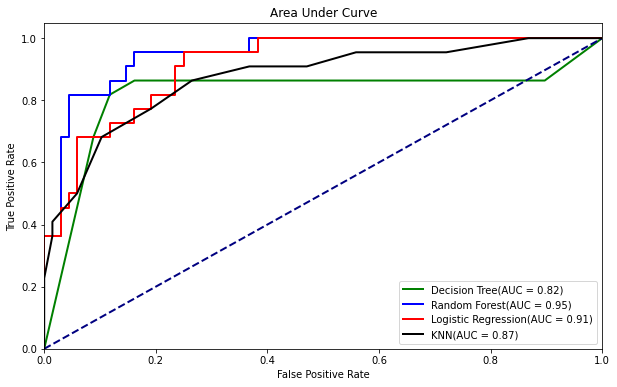

In [82]:
plt.figure(figsize=(10,6))
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(fpr_rf, tpr_rf, color='Blue',
         lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_lr, tpr_lr, color='red',
         lw=lw, label='Logistic Regression(AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_KNN, tpr_KNN, color='black',
         lw=lw, label='KNN(AUC = %0.2f)' % roc_auc_KNN)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## SVM

In [83]:
from sklearn.svm import SVC

In [84]:
# we have to find the optimum value of C and Gamma

In [89]:
svm = SVC(random_state=42)

In [90]:
c_range = [i/10 for i in range(1,100)]

for c in c_range:
    svm.set_params(C=c)
    svm.fit(x_train_std,y_train)
    print(c,svm.score(x_train_std,y_train),svm.score(x_test_std,y_test))

0.1 0.645933014354067 0.7555555555555555
0.2 0.722488038277512 0.7777777777777778
0.3 0.8277511961722488 0.8444444444444444
0.4 0.84688995215311 0.8333333333333334
0.5 0.8516746411483254 0.8444444444444444
0.6 0.8708133971291866 0.8555555555555555
0.7 0.8899521531100478 0.8444444444444444
0.8 0.8899521531100478 0.8444444444444444
0.9 0.9043062200956937 0.8444444444444444
1.0 0.9043062200956937 0.8444444444444444
1.1 0.9043062200956937 0.8444444444444444
1.2 0.9043062200956937 0.8444444444444444
1.3 0.9090909090909091 0.8444444444444444
1.4 0.9138755980861244 0.8444444444444444
1.5 0.9138755980861244 0.8444444444444444
1.6 0.9138755980861244 0.8333333333333334
1.7 0.9186602870813397 0.8333333333333334
1.8 0.9282296650717703 0.8333333333333334
1.9 0.9282296650717703 0.8222222222222222
2.0 0.9282296650717703 0.8222222222222222
2.1 0.9282296650717703 0.8111111111111111
2.2 0.9234449760765551 0.8111111111111111
2.3 0.9282296650717703 0.8
2.4 0.9330143540669856 0.7888888888888889
2.5 0.93301

In [91]:
c_range = [i/100 for i in range(1,100)]

for c in c_range:
    svm.set_params(C=c)
    svm.fit(x_train_std,y_train)
    print(c,svm.score(x_train_std,y_train),svm.score(x_test_std,y_test))

0.01 0.645933014354067 0.7555555555555555
0.02 0.645933014354067 0.7555555555555555
0.03 0.645933014354067 0.7555555555555555
0.04 0.645933014354067 0.7555555555555555
0.05 0.645933014354067 0.7555555555555555
0.06 0.645933014354067 0.7555555555555555
0.07 0.645933014354067 0.7555555555555555
0.08 0.645933014354067 0.7555555555555555
0.09 0.645933014354067 0.7555555555555555
0.1 0.645933014354067 0.7555555555555555
0.11 0.645933014354067 0.7555555555555555
0.12 0.645933014354067 0.7555555555555555
0.13 0.645933014354067 0.7555555555555555
0.14 0.6507177033492823 0.7555555555555555
0.15 0.6555023923444976 0.7555555555555555
0.16 0.6746411483253588 0.7555555555555555
0.17 0.6794258373205742 0.7666666666666667
0.18 0.6889952153110048 0.7777777777777778
0.19 0.7033492822966507 0.7777777777777778
0.2 0.722488038277512 0.7777777777777778
0.21 0.722488038277512 0.7777777777777778
0.22 0.7272727272727273 0.7666666666666667
0.23 0.7320574162679426 0.7777777777777778
0.24 0.7464114832535885 0.78

In [92]:
# c=0.44

In [94]:
c_range = [i/100 for i in range(1,100)]

for c in c_range:
    svm.set_params(gamma=c)
    svm.fit(x_train_std,y_train)
    print(c,svm.score(x_train_std,y_train),svm.score(x_test_std,y_test))

0.01 0.8086124401913876 0.8777777777777778
0.02 0.8277511961722488 0.8888888888888888
0.03 0.8421052631578947 0.8666666666666667
0.04 0.8516746411483254 0.8666666666666667
0.05 0.8708133971291866 0.8555555555555555
0.06 0.8755980861244019 0.8444444444444444
0.07 0.8851674641148325 0.8444444444444444
0.08 0.9043062200956937 0.8444444444444444
0.09 0.9043062200956937 0.8444444444444444
0.1 0.9090909090909091 0.8444444444444444
0.11 0.9138755980861244 0.8444444444444444
0.12 0.9234449760765551 0.8444444444444444
0.13 0.937799043062201 0.8444444444444444
0.14 0.937799043062201 0.8444444444444444
0.15 0.9425837320574163 0.8444444444444444
0.16 0.9521531100478469 0.8333333333333334
0.17 0.9521531100478469 0.8111111111111111
0.18 0.9521531100478469 0.8
0.19 0.9569377990430622 0.8
0.2 0.9617224880382775 0.7888888888888889
0.21 0.9617224880382775 0.7666666666666667
0.22 0.9617224880382775 0.7777777777777778
0.23 0.9617224880382775 0.7666666666666667
0.24 0.9665071770334929 0.7555555555555555
0.

In [95]:
c_range = [i/1000 for i in range(1,100)]

for c in c_range:
    svm.set_params(gamma=c)
    svm.fit(x_train_std,y_train)
    print(c,svm.score(x_train_std,y_train),svm.score(x_test_std,y_test))

0.001 0.645933014354067 0.7555555555555555
0.002 0.6602870813397129 0.7666666666666667
0.003 0.6889952153110048 0.7777777777777778
0.004 0.7177033492822966 0.8111111111111111
0.005 0.7368421052631579 0.8333333333333334
0.006 0.7607655502392344 0.8555555555555555
0.007 0.7703349282296651 0.8555555555555555
0.008 0.784688995215311 0.8555555555555555
0.009 0.8086124401913876 0.8777777777777778
0.01 0.8086124401913876 0.8777777777777778
0.011 0.8086124401913876 0.8777777777777778
0.012 0.8086124401913876 0.8777777777777778
0.013 0.8038277511961722 0.8888888888888888
0.014 0.8181818181818182 0.8777777777777778
0.015 0.8181818181818182 0.8777777777777778
0.016 0.8181818181818182 0.8777777777777778
0.017 0.8181818181818182 0.8777777777777778
0.018 0.8229665071770335 0.8777777777777778
0.019 0.8277511961722488 0.8777777777777778
0.02 0.8277511961722488 0.8888888888888888
0.021 0.8325358851674641 0.8888888888888888
0.022 0.8325358851674641 0.8888888888888888
0.023 0.8325358851674641 0.888888888

In [97]:
# gamma= 0.044

In [99]:
svm = SVC(C=0.44,gamma=0.044,kernel='rbf')
svm.fit(x_train_std,y_train)
print(svm.score(x_train_std,y_train),svm.score(x_test_std,y_test))


0.8325358851674641 0.8666666666666667


In [100]:
svm = SVC(C=0.44,gamma=0.044,kernel='linear')
svm.fit(x_train_std,y_train)
print(svm.score(x_train_std,y_train),svm.score(x_test_std,y_test))

0.8229665071770335 0.8666666666666667


In [101]:
svm = SVC(C=0.44,gamma=0.044,kernel='poly')
svm.fit(x_train_std,y_train)
print(svm.score(x_train_std,y_train),svm.score(x_test_std,y_test))

0.6650717703349283 0.7666666666666667


In [102]:
svm = SVC(C=0.44,gamma=0.044,kernel='sigmoid')
svm.fit(x_train_std,y_train)
print(svm.score(x_train_std,y_train),svm.score(x_test_std,y_test))

0.8086124401913876 0.9


In [103]:
# kernel = 'rbf' gives the better results

In [106]:
svm = SVC(C=0.44,gamma=0.044,kernel='rbf',probability=True,random_state=42)
svm.fit(x_train_std,y_train)
print(svm.score(x_train_std,y_train),svm.score(x_test_std,y_test))


0.8325358851674641 0.8666666666666667


In [107]:
y_pred_svm = svm.predict(x_test_std)
y_prob_svm = svm.predict_proba(x_test_std)

In [109]:
accuracy_svm = accuracy_score(y_test,y_pred_svm)
accuracy_svm

0.8666666666666667

In [110]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        68
           1       0.75      0.68      0.71        22

    accuracy                           0.87        90
   macro avg       0.82      0.80      0.81        90
weighted avg       0.86      0.87      0.86        90



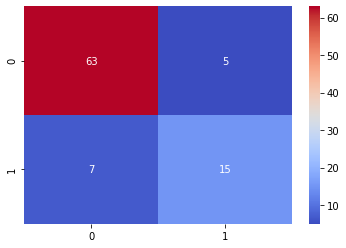

In [111]:
sns.heatmap(confusion_matrix(y_test,y_pred_svm),annot=True,cmap='coolwarm')

In [113]:
fpr_svm,tpr_svm,threshold_svm = roc_curve(y_test,y_prob_svm[:,1])
auc_svm = auc(fpr_svm,tpr_svm)
auc_svm

0.9131016042780749

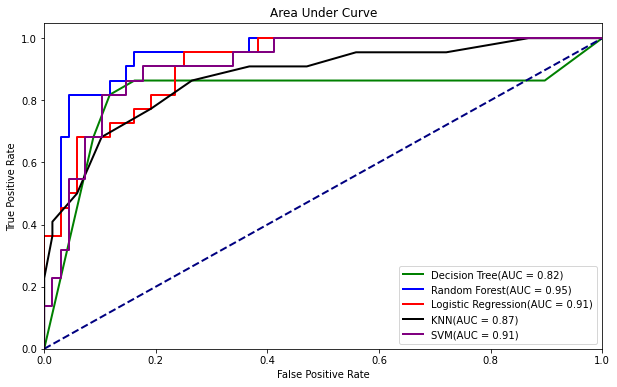

In [114]:
plt.figure(figsize=(10,6))
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(fpr_rf, tpr_rf, color='Blue',
         lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_lr, tpr_lr, color='red',
         lw=lw, label='Logistic Regression(AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_KNN, tpr_KNN, color='black',
         lw=lw, label='KNN(AUC = %0.2f)' % roc_auc_KNN)
plt.plot(fpr_svm, tpr_svm, color='purple',
         lw=lw, label='SVM(AUC = %0.2f)' % auc_svm)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()